Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aiman Lameesa"
ID = "st122876"

---

# Lab 10: Unsupervised Learning with $k$-means and PCA

In this lab, we begin our survey of common unsupervised learning methods such as k-means and PCA.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise

Write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    there's a naive implementation of the algorithm in this notebook below. You can use it or make your own implementation.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a> function from sklearn for create dataset. Or you can make them yourself. :)
</details>

In [2]:
!pip install scikit-learn

In [3]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import pairwise_distances
import random

X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=0.5, random_state=0)

# YOUR CODE HERE
# raise NotImplementedError()

In [4]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[ 0.51985897  4.86229547]
 [ 1.69246883  0.20598168]
 [ 1.35678894  4.36462484]
 [-1.5698694   3.01502873]
 [-1.63667453  2.37586395]]
y=
 [0 1 0 2 2]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data. Separate the data by color.

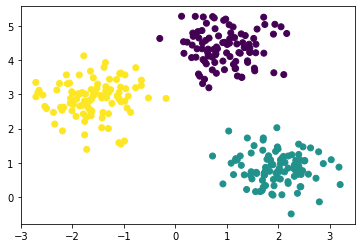

In [5]:
import matplotlib.pyplot as plt

# YOUR CODE HERE

plt.scatter(X[:,0], X[:,1], c=y)

#raise NotImplementedError()

**Expect result**:

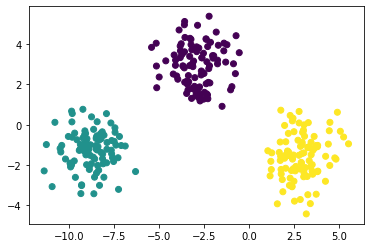

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

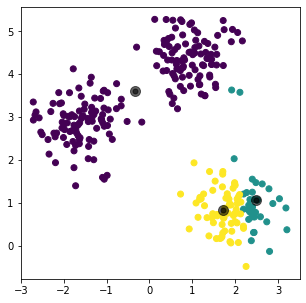

In [7]:
import numpy as np
from IPython.display import clear_output
import time

# 1. initialize 3 random centers
centers = X[random.sample(range(0, X.shape[0]),3)]
means = np.zeros(centers.shape) 

error = 9999999999.0

while True:
    # 2. find the nearest centers for each of the points
    labels = pairwise_distances_argmin(X, centers)
    
    # 3. plot the graph. Do not forget to use clear_output    
    # new_centers = centers
    
    # 4. find the mean of each centers
    for i in range(centers.shape[0]):
        means[i] = np.mean(X[np.where(labels == i)],axis = 0)
        
    # 3. plot the graph. Do not forget to use clear_output
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], s=100, marker = 'o', c="black", alpha=0.6)
    plt.scatter(means[:, 0], means[:, 1], s=100, marker = '.', c="black", alpha=0.6)
    plt.show()
    
    # 5. calculate sum square error to check error. If the error is less than 1e-6, you can stop the loop.
    error = 0.0    
    for i in range(centers.shape[0]):
        error += ((means[i,:] - centers[i,:])**2).sum()
        
    if error < 1e-6:
        break
        
    else:
        centers = means 
    
    time.sleep(0.3)
    clear_output()
    

# YOUR CODE HERE
# raise NotImplementedError()

In [8]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[-0.34105117  3.61487282]
 [ 2.47833066  1.05703024]
 [ 1.71548554  0.8203646 ]]
success!


**Expect result**:

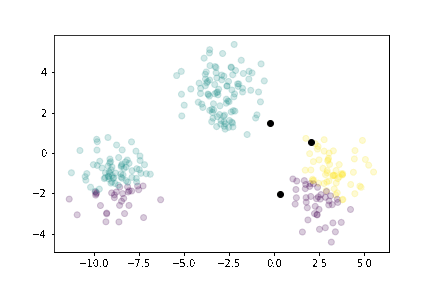

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [2]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [3]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

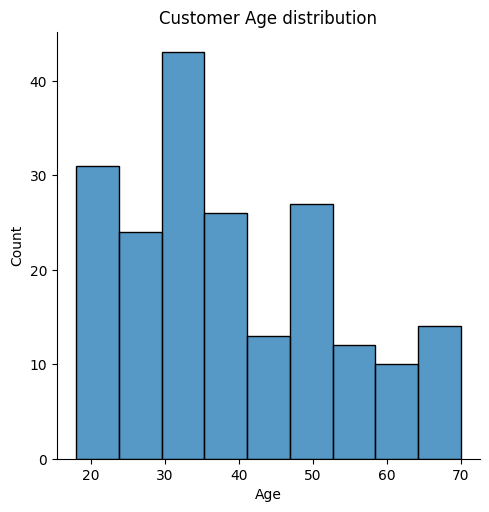

In [4]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

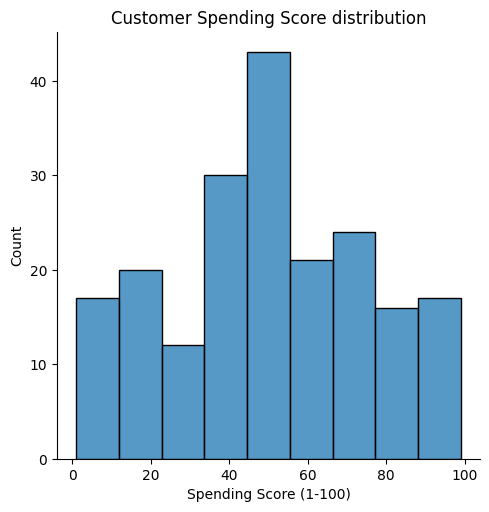

In [5]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

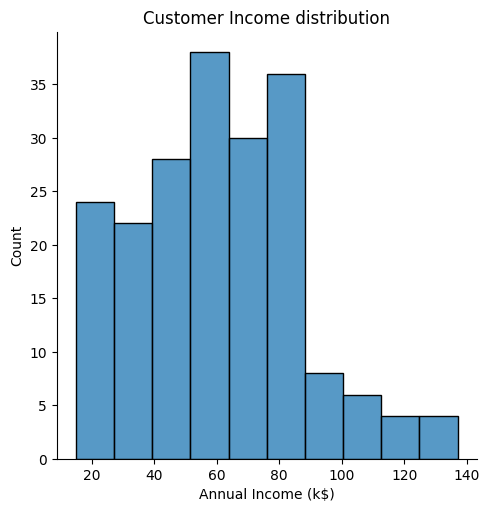

In [6]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

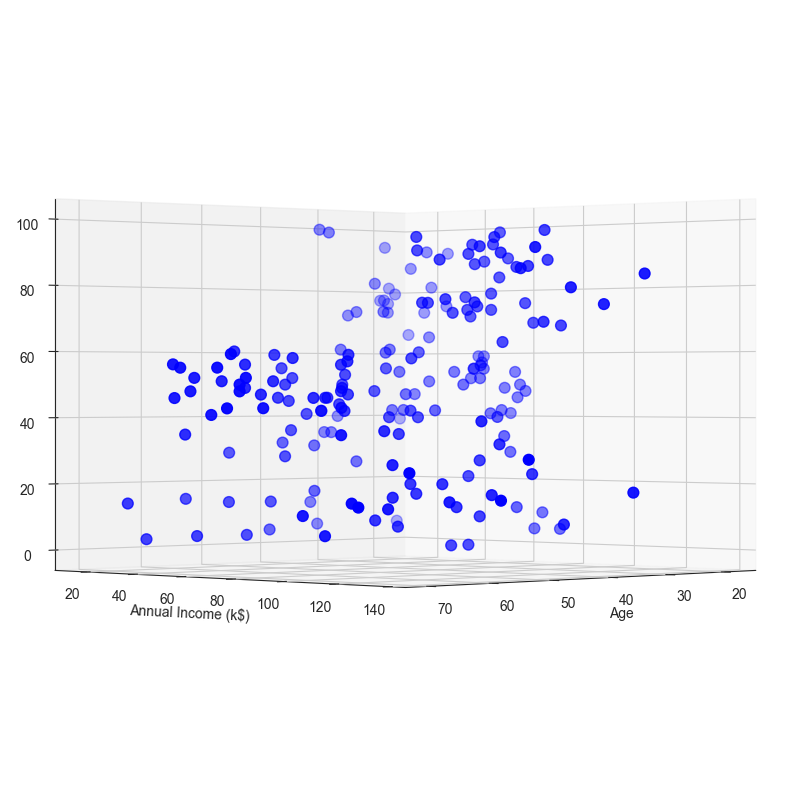

In [7]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [8]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

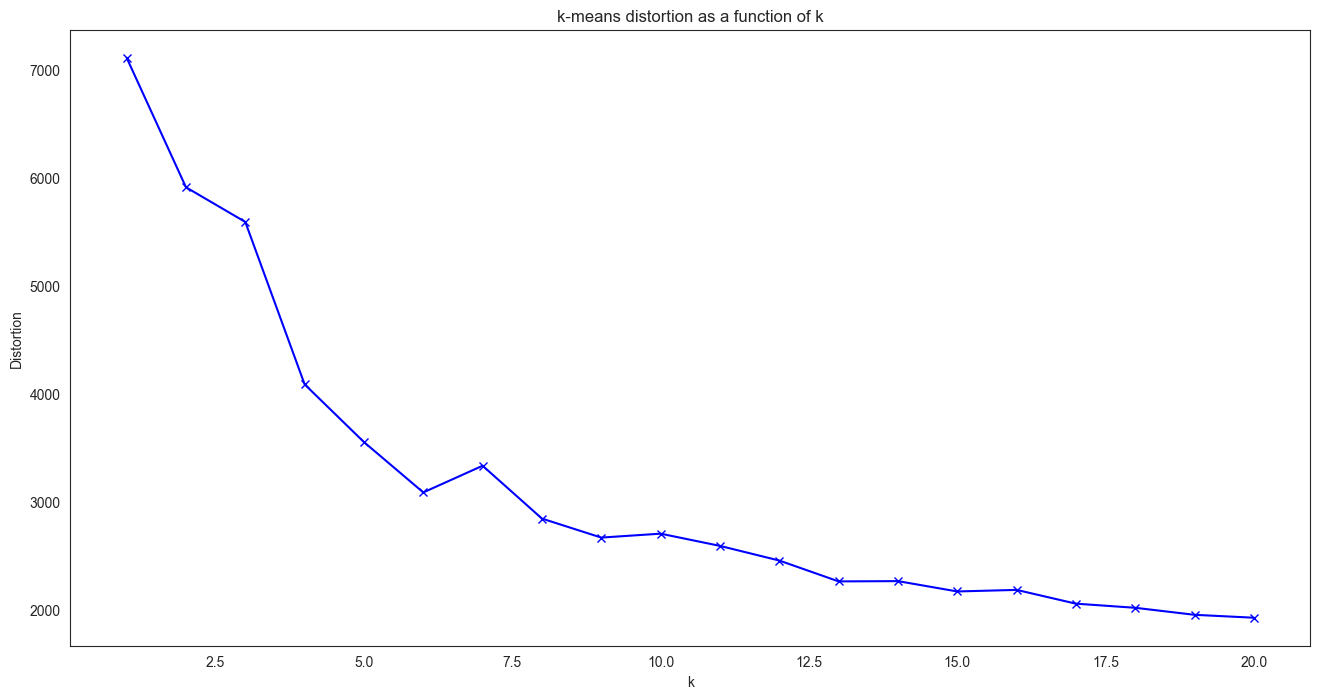

In [11]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

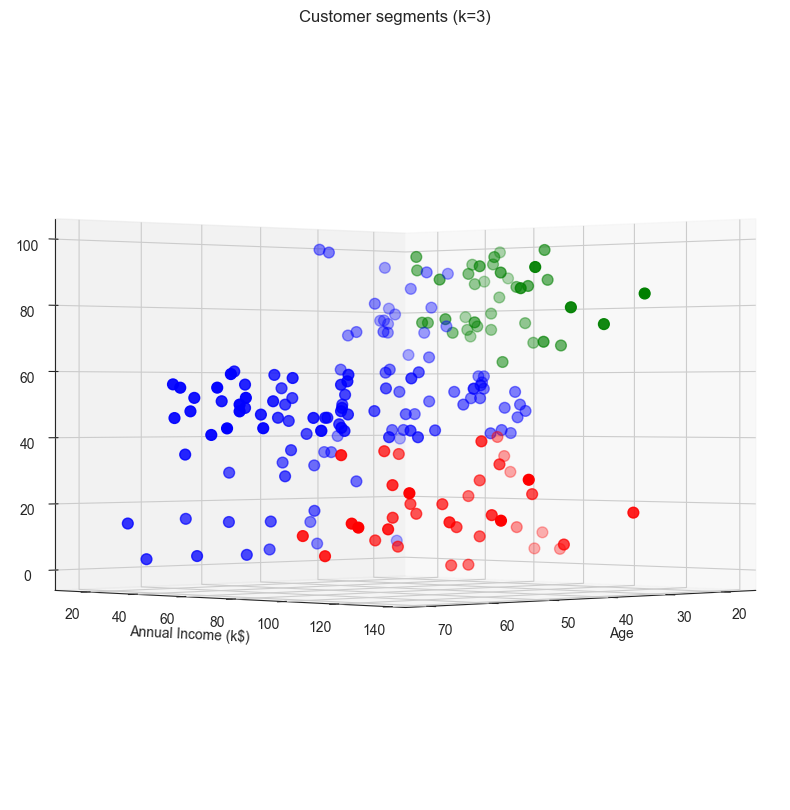

In [12]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

1. Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.
2. Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [13]:
# YOUR CODE HERE

print('Gender distribution in label 0 is:') 
print(df['Gender'].loc[df['label'] == 0].value_counts())

print('Gender distribution in label 1 is:')
print(df['Gender'].loc[df['label'] == 1].value_counts())

print('Gender distribution in lable 2 is:')
print(df['Gender'].loc[df['label'] == 2].value_counts())
      
print('\n')

print('Average age in label 0 is ', round(df['Age'].loc[df['label'] == 0].mean(),2))
print('Average age in label 1 is ', round(df['Age'].loc[df['label'] == 1].mean(),2))
print('Average age in label 2 is ', round(df['Age'].loc[df['label'] == 2].mean(),2))

print('\n')

print('Average annual income in label 0 is ', round(df['Annual Income (k$)'].loc[df['label'] == 0].mean(),2))
print('Average annual income in label 1 is ', round(df['Annual Income (k$)'].loc[df['label'] == 1].mean(),2))
print('Average annual income in label 2 is ', round(df['Annual Income (k$)'].loc[df['label'] == 2].mean(),2))

print('\n')

print('Average spending score in label 0 is ', round(df['Spending Score (1-100)'].loc[df['label'] == 0].mean(),2))
print('Average spending score in label 1 is ', round(df['Spending Score (1-100)'].loc[df['label'] == 1].mean(),2))
print('Average spending score in label 2 is ', round(df['Spending Score (1-100)'].loc[df['label'] == 2].mean(),2))

# raise NotImplementedError()

Gender distribution in label 0 is:
Female    73
Male      50
Name: Gender, dtype: int64
Gender distribution in label 1 is:
Male      20
Female    18
Name: Gender, dtype: int64
Gender distribution in lable 2 is:
Female    21
Male      18
Name: Gender, dtype: int64


Average age in label 0 is  40.33
Average age in label 1 is  40.39
Average age in label 2 is  32.69


Average annual income in label 0 is  44.15
Average annual income in label 1 is  87.0
Average annual income in label 2 is  86.54


Average spending score in label 0 is  49.83
Average spending score in label 1 is  18.63
Average spending score in label 2 is  82.13


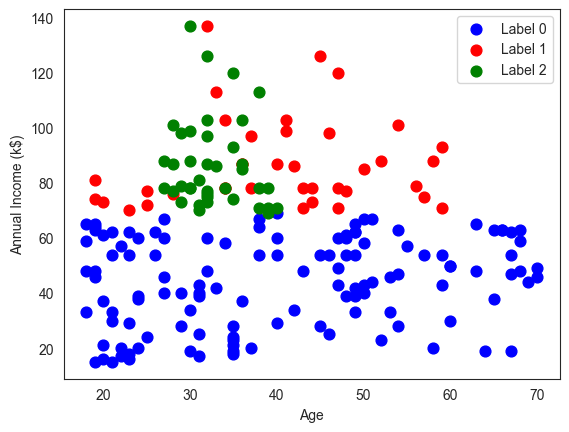

In [14]:
fig, ax = plt.subplots()
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0],  c='blue', s=60 , label = 'Label 0')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1],  c='red', s=60, label = 'Label 1')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2],  c='green', s=60, label = 'Label 2')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

The clusters for this plot seem to be separated by Annual Income mainly, where there is a group with low annual income than the other two groups. For the other two groups, the datapoints seem to be overlapping in the middle.

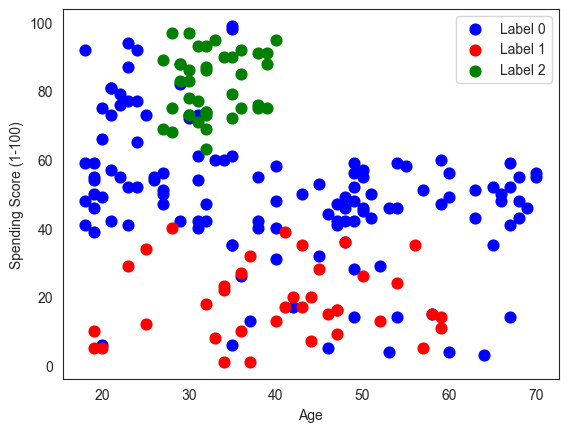

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.Age[df.label == 0], df["Spending Score (1-100)"][df.label == 0],  c='blue', s=60 , label = 'Label 0')
ax.scatter(df.Age[df.label == 1], df["Spending Score (1-100)"][df.label == 1],  c='red', s=60, label = 'Label 1')
ax.scatter(df.Age[df.label == 2], df["Spending Score (1-100)"][df.label == 2],  c='green', s=60, label = 'Label 2')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

The clusters in this plot seem to be separated by Spending Score mainly, but there are still many overlapping data points among these 3 groups.

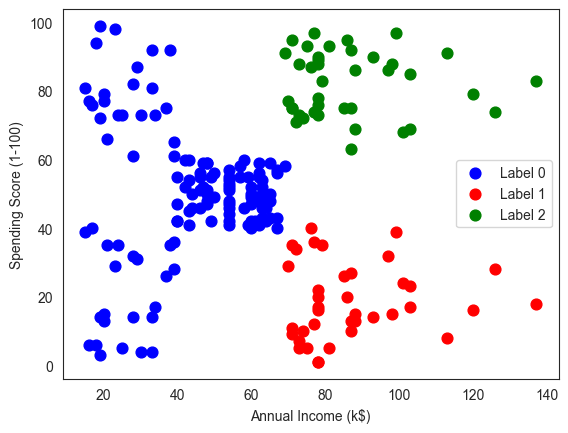

In [16]:
fig, ax = plt.subplots()
ax.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0],  c='blue', s=60 , label = 'Label 0')
ax.scatter(df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1],  c='red', s=60, label = 'Label 1')
ax.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2],  c='green', s=60, label = 'Label 2')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

The clusters are perfectly observable in this plot where they are grouped separately by Annual Income and Spending Score. The cluters describe that:

1. The first group of customers have lower annual income than the other two groups with different spending scores.

2. The second group of customers have high annual income but they usually have less spending scores over the time.

3. The customers from the last group have both high annual income and high spending scores.

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

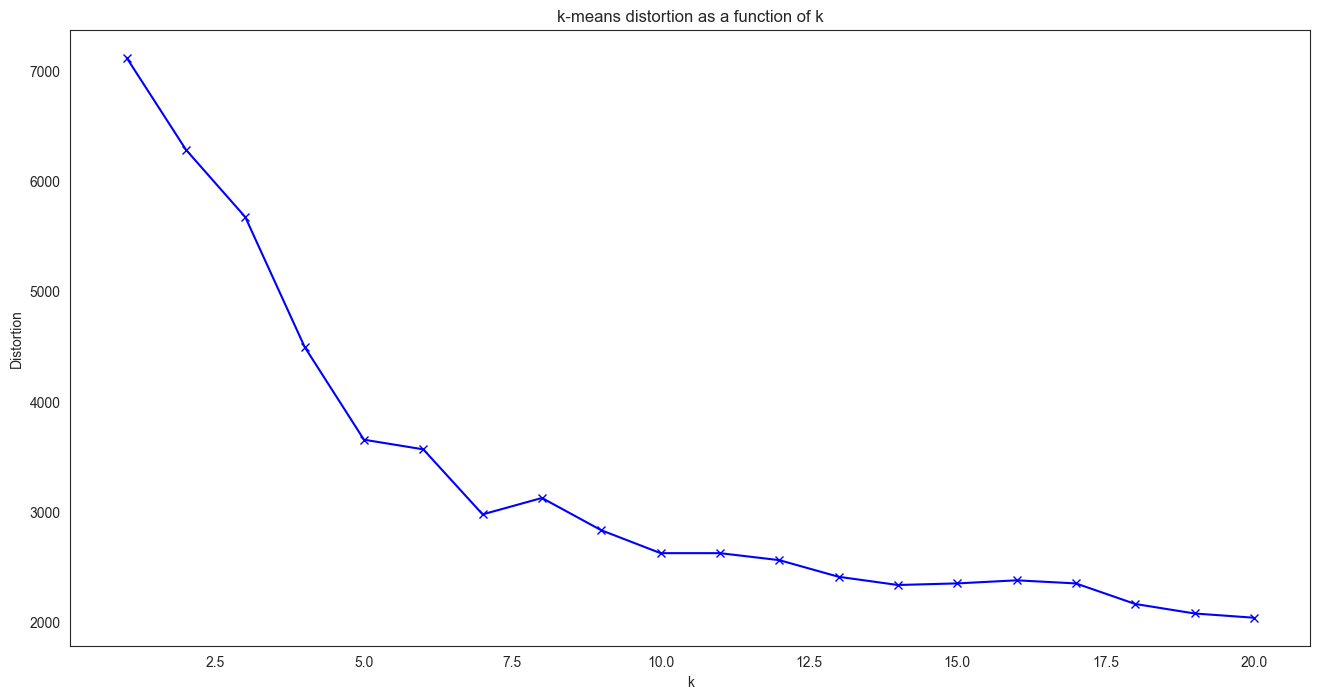

In [18]:
# YOUR CODE HERE

# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = 0
    min_c = 0
    min_means = 0
    
    init_iter = 5
    
    for i in range(init_iter):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
            
        if distortion > min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
            
    distortions[k-1] = min_distortion


# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

# raise NotImplementedError()

The distortions for this curve decrease with the number of increasing runs. In this curve, we can observe a slight 'elbow' where k = 3, but we get a more prominent one when k = 5. 

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [19]:
!pip install kmeans-pytorch
!pip install tqdm

You should consider upgrading via the 'C:\Users\aiman\OneDrive\Documents\Lab 08\pytorch_env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aiman\OneDrive\Documents\Lab 08\pytorch_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [20]:
import torch
from kmeans_pytorch import kmeans

In [21]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 11it [00:00, 135.31it/s, center_shift=0.000000, iteration=11, tol=0.000100]


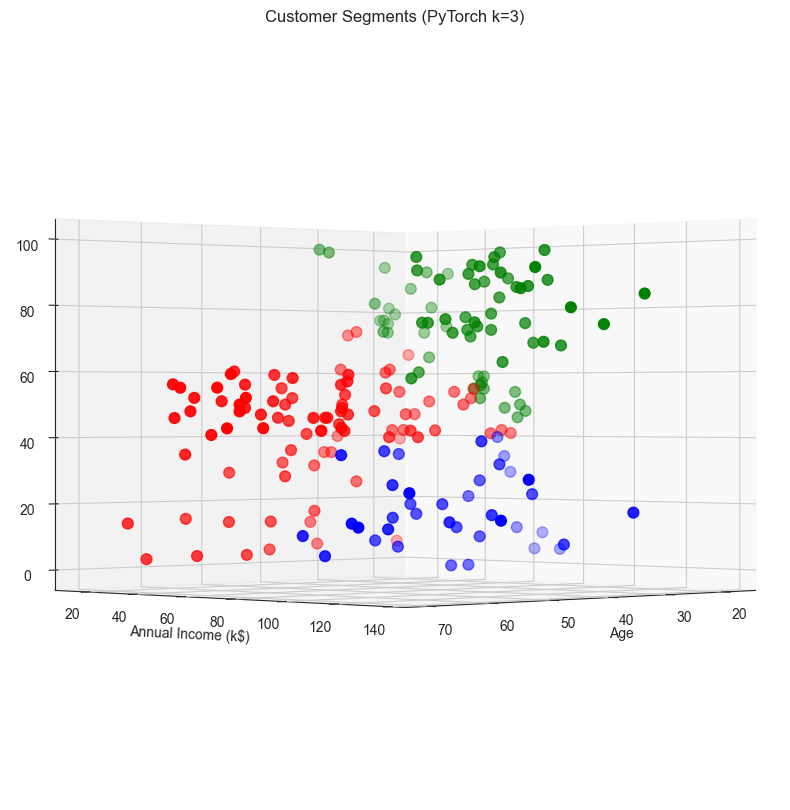

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

The dataset I used for take-home exercise is taken from kaggle. The link of the dataset is given here:
https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank_transactions.csv")

In [4]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
# Taking first 5000 rows since the dataset is extremely large

df = df.iloc[:5000,:] 

In [6]:
df.shape

(5000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            5000 non-null   object 
 1   CustomerID               5000 non-null   object 
 2   CustomerDOB              4988 non-null   object 
 3   CustGender               4998 non-null   object 
 4   CustLocation             4999 non-null   object 
 5   CustAccountBalance       4992 non-null   float64
 6   TransactionDate          5000 non-null   object 
 7   TransactionTime          5000 non-null   int64  
 8   TransactionAmount (INR)  5000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB


In [8]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,4.992000e+03,5000.000000,5000.000000
mean,1.126840e+05,170762.802600,1956.568164
std,5.100682e+05,43468.392877,7275.812870
min,0.000000e+00,1532.000000,0.000000
25%,5.589227e+03,151435.750000,158.000000
50%,1.885953e+04,191943.000000,440.000000
75%,6.549887e+04,204656.500000,1200.000000
max,1.777298e+07,235357.000000,137890.000000


In [9]:
df.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                12
CustGender                  2
CustLocation                1
CustAccountBalance          8
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [10]:
df.drop(['TransactionID','CustomerID'], axis=1, inplace=True)

In [11]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [12]:
from datetime import date

df = df[~df['CustomerDOB'].isnull()]
df.CustomerDOB = pd.to_datetime(df.CustomerDOB, errors='coerce')

In [13]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [14]:
df.shape

(4988, 7)

In [15]:
def age(dob):
    today = date.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [16]:
df['Age'] = df.CustomerDOB.apply(age)

In [17]:
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)

In [18]:
df.shape

(4623, 7)

In [19]:
df.isnull().sum()

CustGender                 2
CustLocation               1
CustAccountBalance         8
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [20]:
df['CustGender'].value_counts()

M    3362
F    1259
Name: CustGender, dtype: int64

In [21]:
df['CustGender'].unique()

array(['F', 'M', nan], dtype=object)

In [22]:
df.isnull().sum()

CustGender                 2
CustLocation               1
CustAccountBalance         8
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [23]:
df = df[~df['CustGender'].isnull()]
df = df[~df['CustLocation'].isnull()]

In [24]:
df.CustAccountBalance = df.CustAccountBalance.fillna(df.groupby('CustLocation')['CustAccountBalance'].transform('mean'))

In [25]:
df.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         1
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [26]:
df = df[~df.CustAccountBalance.isnull()]

In [27]:
df.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [28]:
df.shape

(4619, 7)

In [29]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,28
2,F,MUMBAI,17874.44,2/8/16,142712,459.0,25
3,F,MUMBAI,866503.21,2/8/16,142714,2060.0,49
4,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,34
5,F,ITANAGAR,53609.20,2/8/16,173940,676.0,50


In [30]:
df.TransactionDate = pd.to_datetime(df.TransactionDate, errors='coerce')

In [31]:
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionDay'] = df.TransactionDate.dt.day

In [32]:
df.drop('TransactionDate',axis=1, inplace=True)

In [33]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,TransactionDay
0,F,JAMSHEDPUR,17819.05,143207,25.0,28,2,8
2,F,MUMBAI,17874.44,142712,459.0,25,2,8
3,F,MUMBAI,866503.21,142714,2060.0,49,2,8
4,F,NAVI MUMBAI,6714.43,181156,1762.5,34,2,8
5,F,ITANAGAR,53609.20,173940,676.0,50,2,8


<AxesSubplot: xlabel='Age', ylabel='CustAccountBalance'>

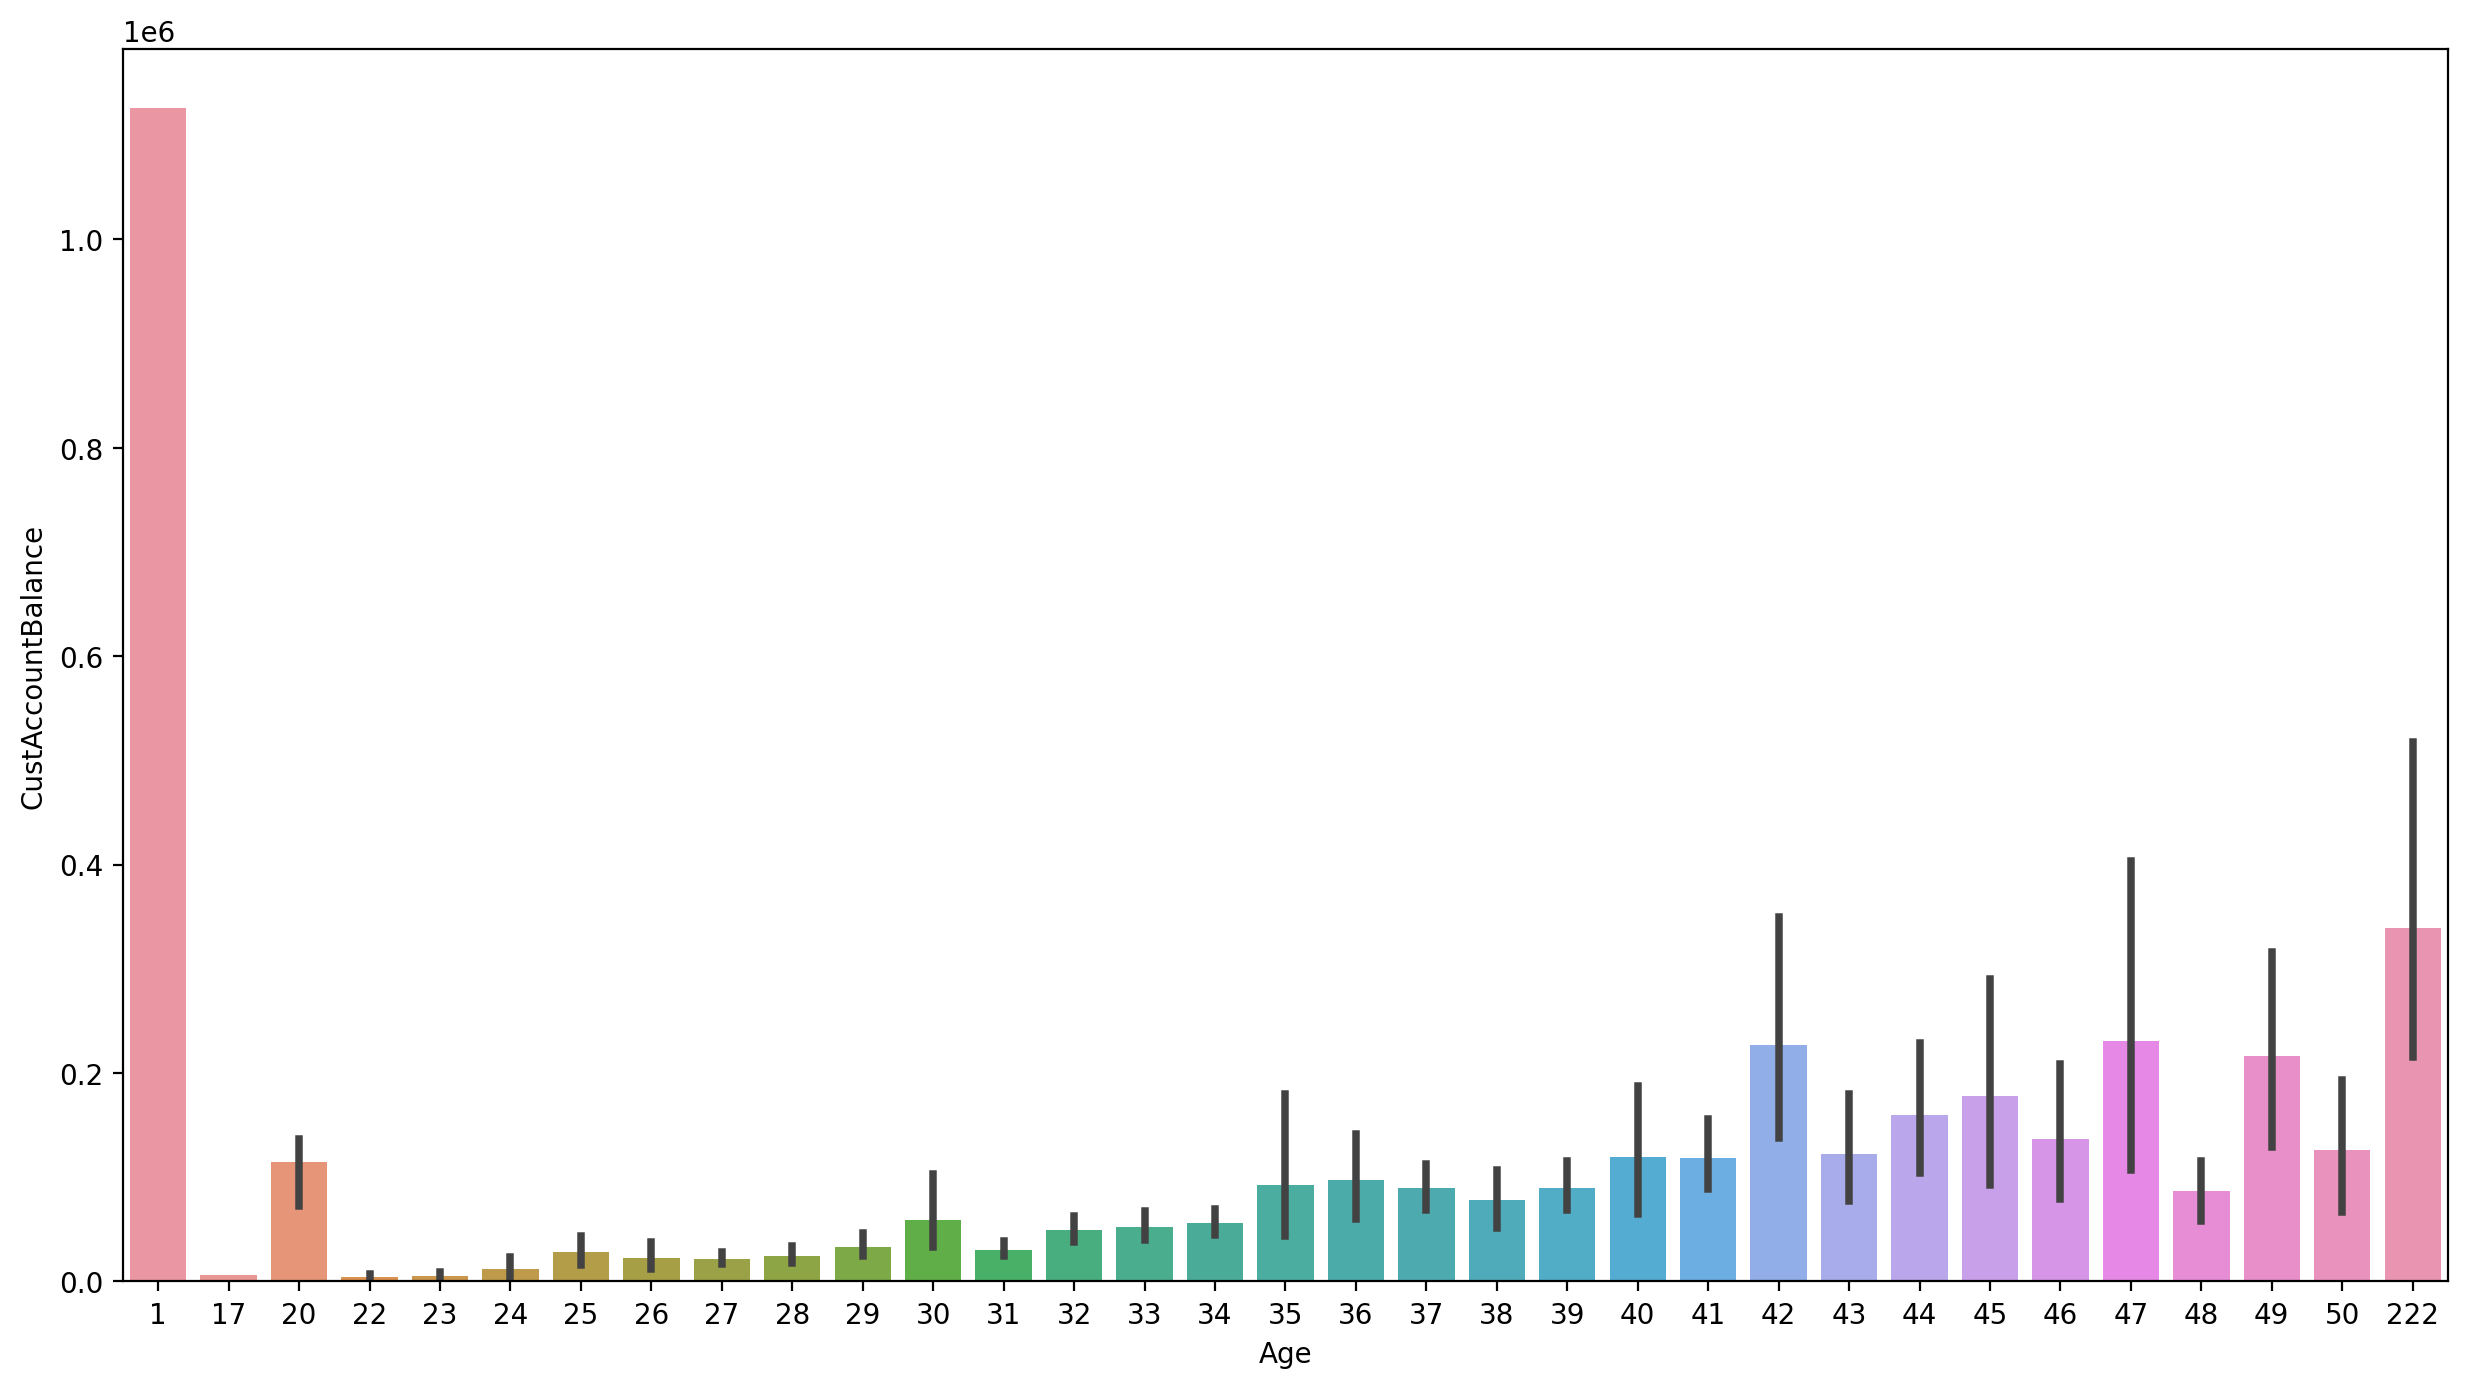

In [34]:
plt.figure(figsize=(15,8), dpi=200)
sns.barplot(data=df, x='Age', y='CustAccountBalance')

<AxesSubplot: xlabel='Age', ylabel='TransactionAmount (INR)'>

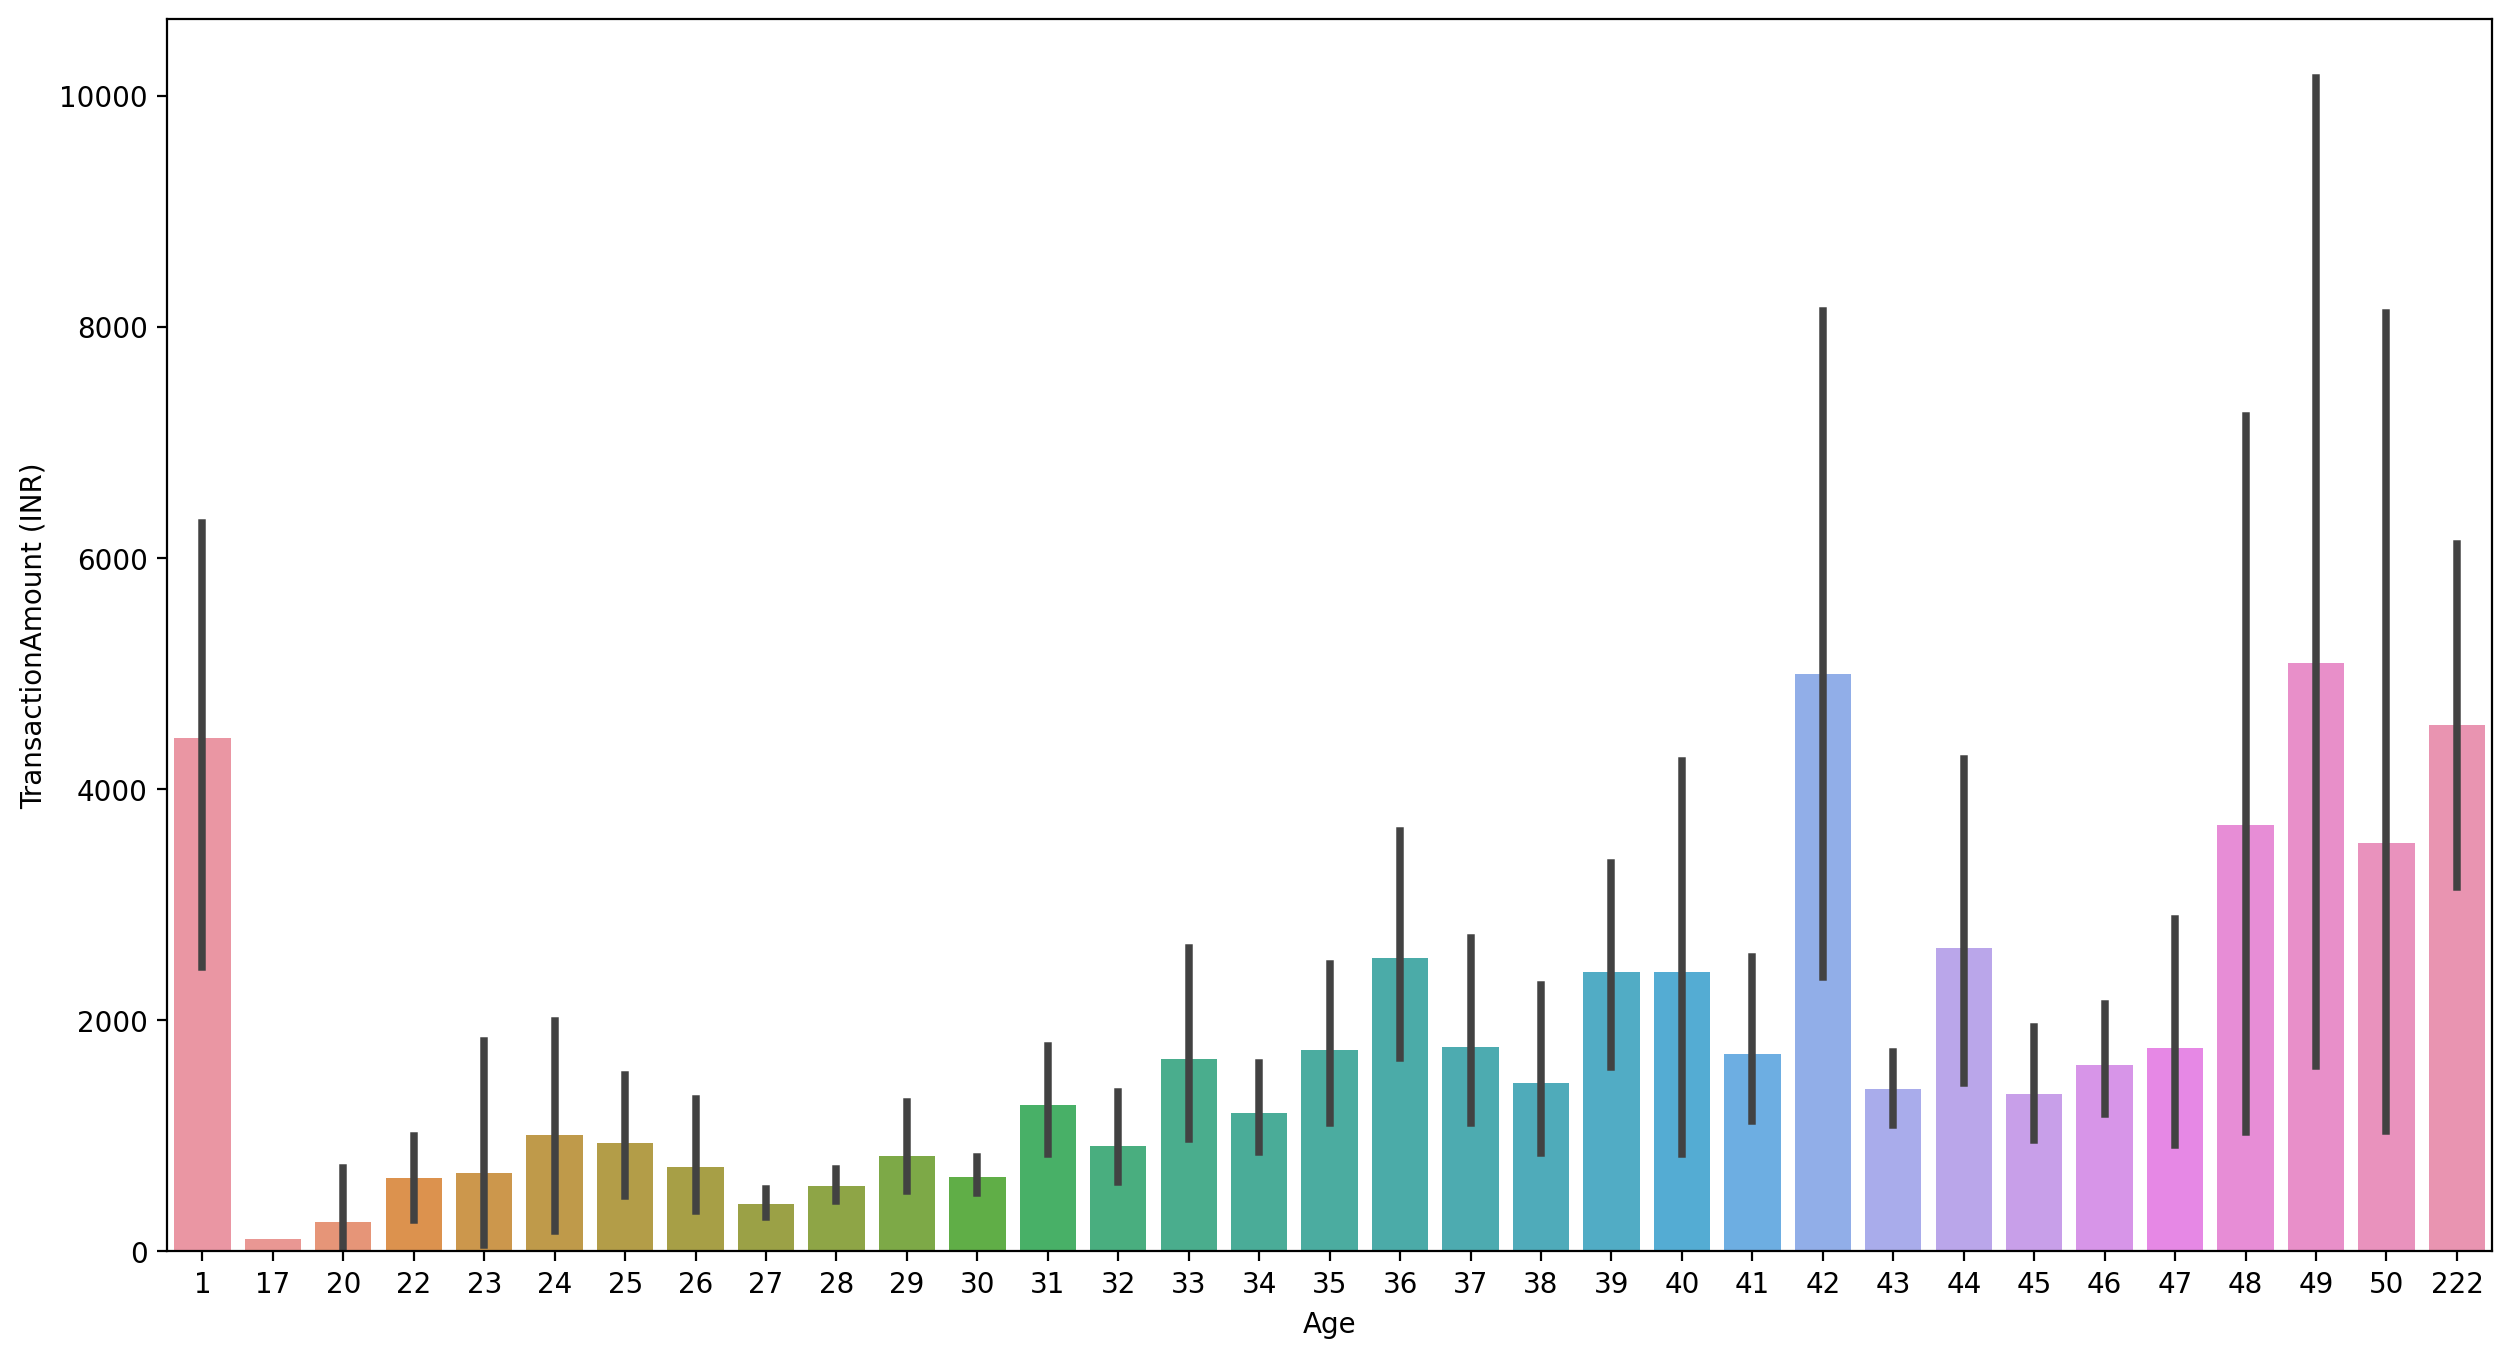

In [35]:
plt.figure(figsize=(15,8), dpi=200)
sns.barplot(data=df, x='Age', y='TransactionAmount (INR)')

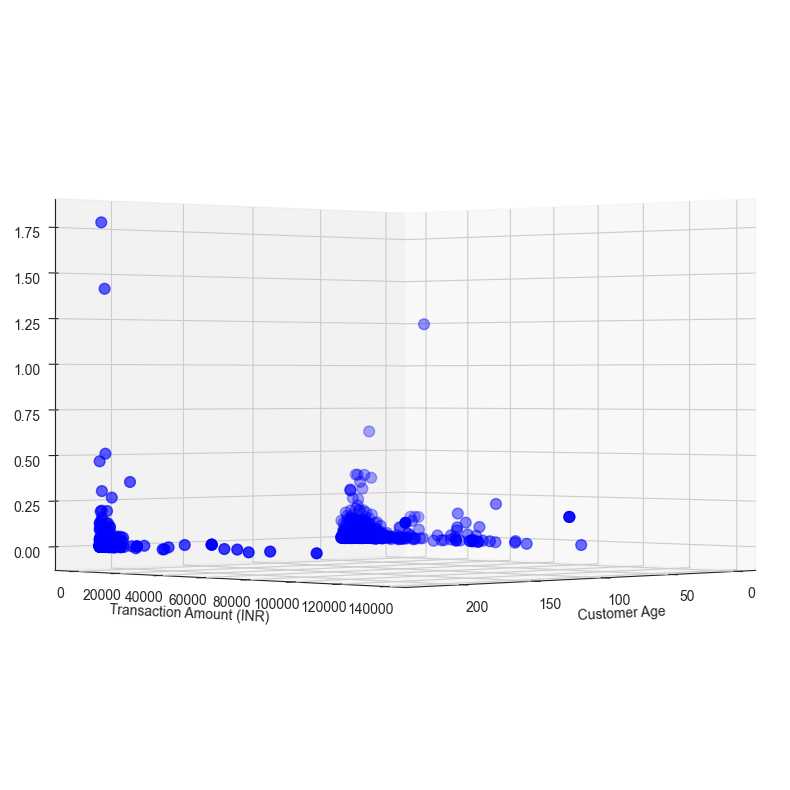

In [36]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["TransactionAmount (INR)"], df.CustAccountBalance, c='blue', s=60)
ax.view_init(0,45)

# plt.xlabel("Customer Account Balance")
plt.xlabel("Customer Age")
plt.ylabel("Transaction Amount (INR)")
ax.set_zlabel("Customer Account Balance")
plt.show()

In [37]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

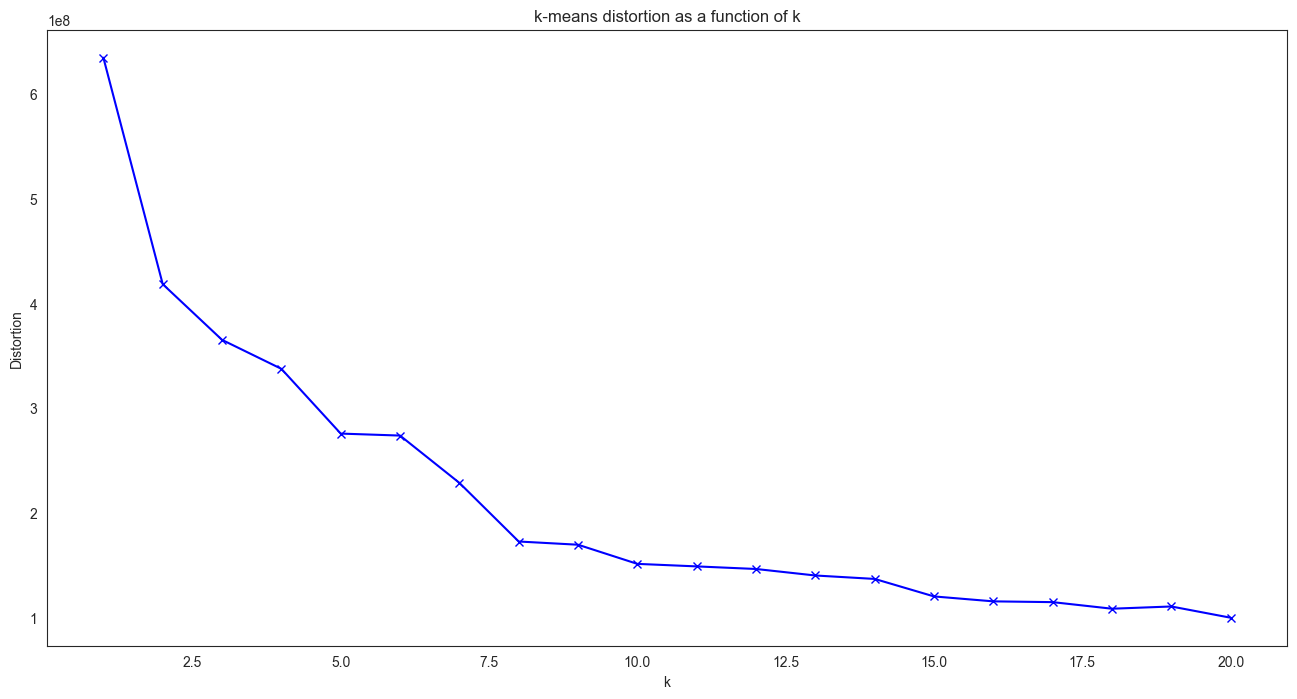

In [39]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,2:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

From this plot, we can observe that there is a prominent 'elbow' when k = 5. That is why, I applied K-means for k = 5.

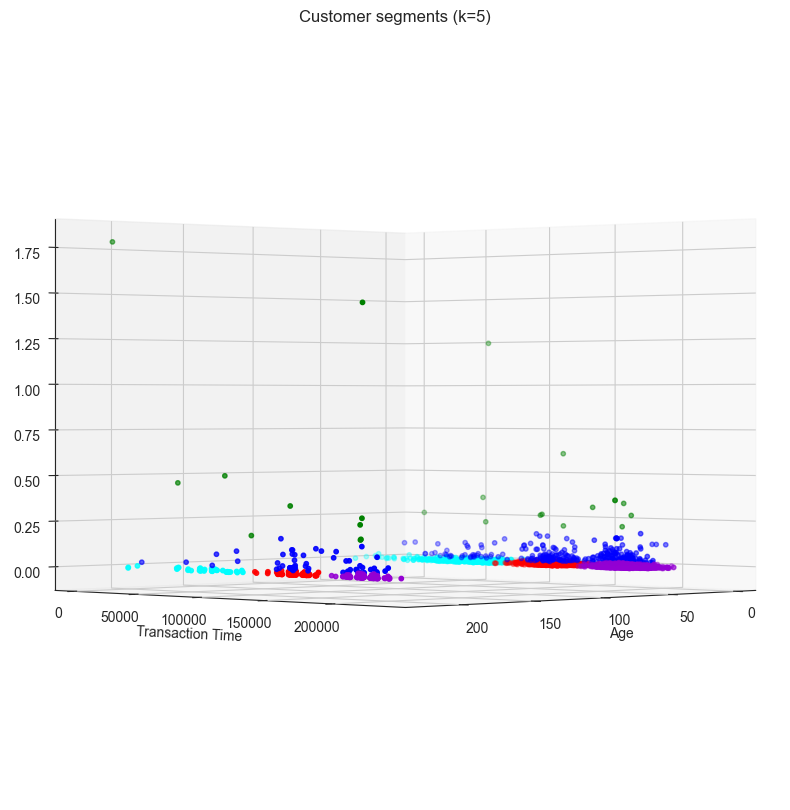

In [40]:
# Re-run k-means with k=5

k = 5
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df.TransactionTime[df.label == 0], df.CustAccountBalance[df.label == 0], c='blue', s=10)
ax.scatter(df.Age[df.label == 1], df.TransactionTime[df.label == 1], df.CustAccountBalance[df.label == 1], c='red', s=10)
ax.scatter(df.Age[df.label == 2], df.TransactionTime[df.label == 2], df.CustAccountBalance[df.label == 2], c='green', s=10)
ax.scatter(df.Age[df.label == 3], df.TransactionTime[df.label == 3], df.CustAccountBalance[df.label == 3], c='cyan', s=10)
ax.scatter(df.Age[df.label == 4], df.TransactionTime[df.label == 4], df.CustAccountBalance[df.label == 4], c='darkviolet', s=10)
# ax.scatter(df.Age[df.label == 5], df.TransactionTime[df.label == 5], df.CustAccountBalance[df.label == 5], c='darkgoldenrod', s=10)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Transaction Time")
ax.set_zlabel("Customer Account Balance")
plt.title('Customer segments (k=5)')
plt.show()

In [41]:
print('Gender distribution in label 0 is:') 
print(df['CustGender'].loc[df['label'] == 0].value_counts())

print('Gender distribution in label 1 is:')
print(df['CustGender'].loc[df['label'] == 1].value_counts())

print('Gender distribution in lable 2 is:')
print(df['CustGender'].loc[df['label'] == 2].value_counts())

print('Gender distribution in lable 3 is:')
print(df['CustGender'].loc[df['label'] == 3].value_counts())

print('Gender distribution in lable 4 is:')
print(df['CustGender'].loc[df['label'] == 4].value_counts())

Gender distribution in label 0 is:
M    247
F    120
Name: CustGender, dtype: int64
Gender distribution in label 1 is:
M    983
F    380
Name: CustGender, dtype: int64
Gender distribution in lable 2 is:
M    19
F     5
Name: CustGender, dtype: int64
Gender distribution in lable 3 is:
M    481
F    152
Name: CustGender, dtype: int64
Gender distribution in lable 4 is:
M    1630
F     602
Name: CustGender, dtype: int64


In [42]:
print('Average account balance in label 0 is ', round(df['CustAccountBalance'].loc[df['label'] == 0].mean(),2))
print('Average account balance in label 1 is ', round(df['CustAccountBalance'].loc[df['label'] == 1].mean(),2))
print('Average account balance in label 2 is ', round(df['CustAccountBalance'].loc[df['label'] == 2].mean(),2))
print('Average account balance in label 3 is ', round(df['CustAccountBalance'].loc[df['label'] == 3].mean(),2))
print('Average account balance in label 4 is ', round(df['CustAccountBalance'].loc[df['label'] == 4].mean(),2))

print('\n')

print('Average transaction time in label 0 is ', round(df['TransactionTime'].loc[df['label'] == 0].mean(),2))
print('Average transaction time in label 1 is ', round(df['TransactionTime'].loc[df['label'] == 1].mean(),2))
print('Average transaction time in label 2 is ', round(df['TransactionTime'].loc[df['label'] == 2].mean(),2))
print('Average transaction time in label 3 is ', round(df['TransactionTime'].loc[df['label'] == 3].mean(),2))
print('Average transaction time in label 4 is ', round(df['TransactionTime'].loc[df['label'] == 4].mean(),2))

print('\n')

print('Average transaction amount in label 0 is ', round(df['TransactionAmount (INR)'].loc[df['label'] == 0].mean(),2))
print('Average transaction amount in label 1 is ', round(df['TransactionAmount (INR)'].loc[df['label'] == 1].mean(),2))
print('Average transaction amount in label 2 is ', round(df['TransactionAmount (INR)'].loc[df['label'] == 2].mean(),2))
print('Average transaction amount in label 3 is ', round(df['TransactionAmount (INR)'].loc[df['label'] == 3].mean(),2))
print('Average transaction amount in label 4 is ', round(df['TransactionAmount (INR)'].loc[df['label'] == 4].mean(),2))

print('\n')

print('Average age in label 0 is ', round(df['Age'].loc[df['label'] == 0].mean(),2))
print('Average age in label 1 is ', round(df['Age'].loc[df['label'] == 1].mean(),2))
print('Average age in label 2 is ', round(df['Age'].loc[df['label'] == 2].mean(),2))
print('Average age in label 3 is ', round(df['Age'].loc[df['label'] == 3].mean(),2))
print('Average age in label 4 is ', round(df['Age'].loc[df['label'] == 4].mean(),2))

Average account balance in label 0 is  541730.57
Average account balance in label 1 is  33270.05
Average account balance in label 2 is  4624525.16
Average account balance in label 3 is  34978.77
Average account balance in label 4 is  31848.93


Average transaction time in label 0 is  171595.0
Average transaction time in label 1 is  154875.55
Average transaction time in label 2 is  154080.08
Average transaction time in label 3 is  87914.36
Average transaction time in label 4 is  205624.71


Average transaction amount in label 0 is  5230.59
Average transaction amount in label 1 is  2092.76
Average transaction amount in label 2 is  6569.47
Average transaction amount in label 3 is  1126.03
Average transaction amount in label 4 is  1202.0


Average age in label 0 is  68.95
Average age in label 1 is  47.53
Average age in label 2 is  115.96
Average age in label 3 is  44.85
Average age in label 4 is  44.37


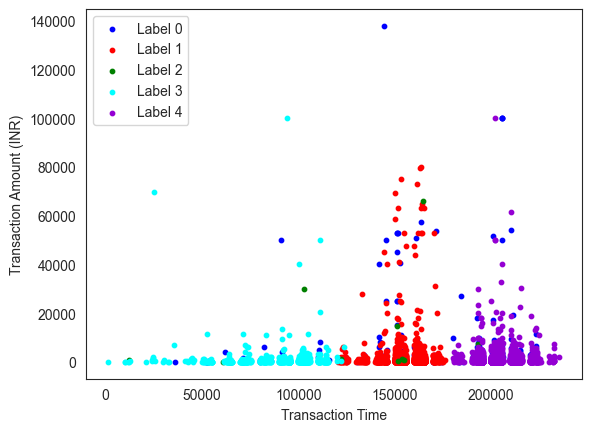

In [45]:
fig, ax = plt.subplots()
ax.scatter(df['TransactionTime'][df.label == 0], df["TransactionAmount (INR)"][df.label == 0],  c='blue', s=10 , label = 'Label 0')
ax.scatter(df['TransactionTime'][df.label == 1], df["TransactionAmount (INR)"][df.label == 1],  c='red', s=10, label = 'Label 1')
ax.scatter(df['TransactionTime'][df.label == 2], df["TransactionAmount (INR)"][df.label == 2],  c='green', s=10, label = 'Label 2')
ax.scatter(df['TransactionTime'][df.label == 3], df["TransactionAmount (INR)"][df.label == 3],  c='cyan', s=10, label = 'Label 3')
ax.scatter(df['TransactionTime'][df.label == 4], df["TransactionAmount (INR)"][df.label == 4],  c='darkviolet', s=10, label = 'Label 4')
# ax.scatter(df['TransactionTime'][df.label == 5], df["TransactionAmount (INR)"][df.label == 5],  c='yellow', s=10, label = 'Label 5')

plt.xlabel("Transaction Time")
plt.ylabel("Transaction Amount (INR)")
plt.legend()
plt.show()

From this plot, we can observe the 3 groups of customers clearly in terms of Transaction Time. The other 2 groups are not clearly visible in this plot but probably they are clustered depending on the other features.

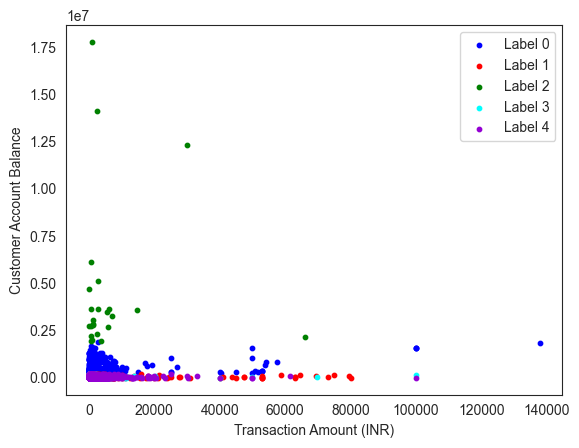

In [46]:
fig, ax = plt.subplots()
ax.scatter(df["TransactionAmount (INR)"][df.label == 0], df["CustAccountBalance"][df.label == 0],  c='blue', s=10 , label = 'Label 0')
ax.scatter(df["TransactionAmount (INR)"][df.label == 1], df["CustAccountBalance"][df.label == 1],  c='red', s=10, label = 'Label 1')
ax.scatter(df["TransactionAmount (INR)"][df.label == 2], df["CustAccountBalance"][df.label == 2],  c='green', s=10, label = 'Label 2')
ax.scatter(df["TransactionAmount (INR)"][df.label == 3], df["CustAccountBalance"][df.label == 3],  c='cyan', s=10, label = 'Label 3')
ax.scatter(df["TransactionAmount (INR)"][df.label == 4], df["CustAccountBalance"][df.label == 4],  c='darkviolet', s=10, label = 'Label 4')
# ax.scatter(df["TransactionAmount (INR)"][df.label == 5], df["CustAccountBalance"][df.label == 5],  c='yellow', s=10, label = 'Label 5')

plt.xlabel("Transaction Amount (INR)")
plt.ylabel("Customer Account Balance")
plt.legend()
plt.show()

The two groups that are cluster 1 (Label 0) and cluster 3 (Label 2) were not properly visible in the previous plot. But we can clearly observe those groups in this plot, whereas Customer Account Balance plays an important role for these two groups. Apart from these two groups, we can observe cluster 5 (Label 4) clearly, and some of cluster 2 (Label 1), indicating the groups of customers having low account balance but different transaction amount.

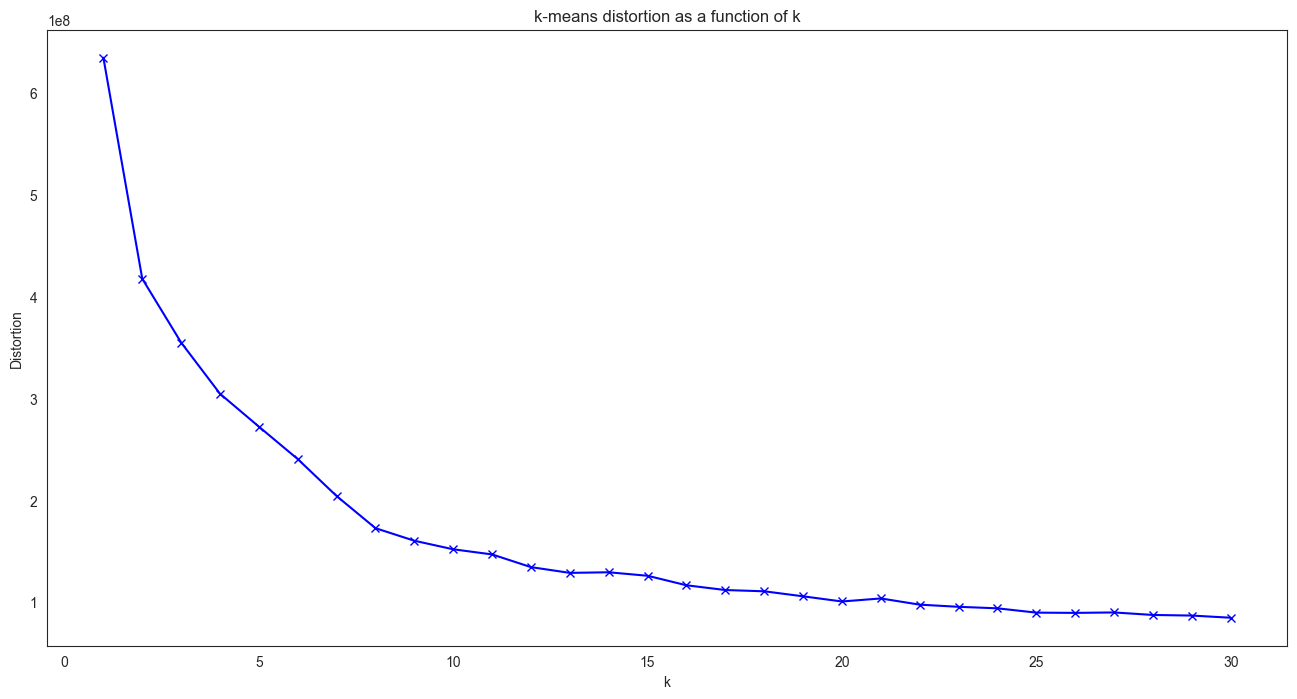

In [49]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,2:])

# Intialize hyperparameters

max_k = 30
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    
    init_iter = 5
    
    for _ in range(init_iter):
        means = init_kmeans(X, k)
        new_distortion = 0
        
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
            
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion


# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

While modifying the optimization for k number of runs, a prominent 'elbow' is noticeable when k = 8. So, I tried K-means using k = 8 after that. 

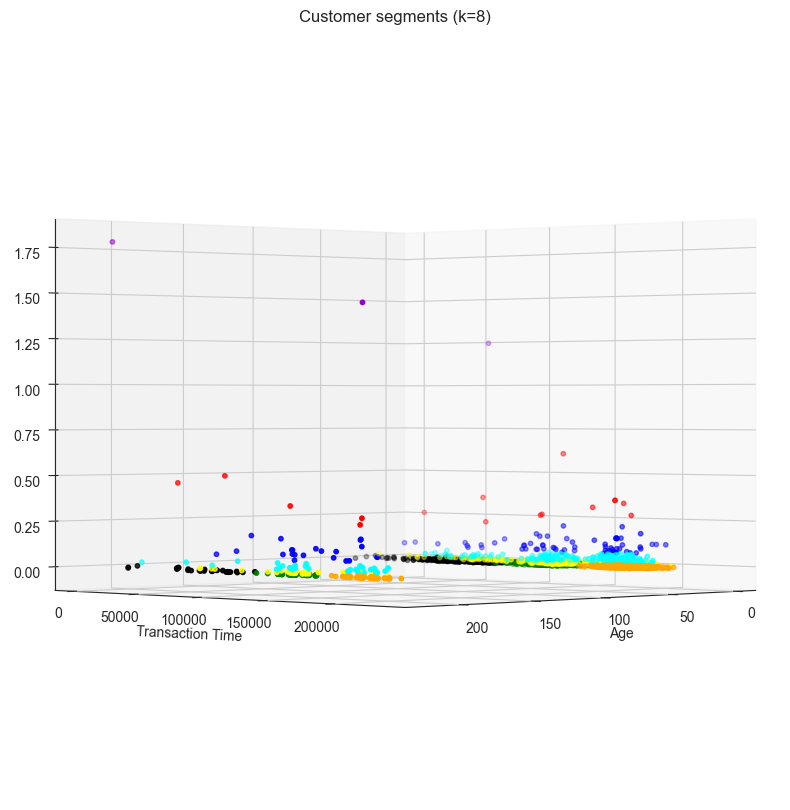

In [53]:
# Re-run k-means with k=8

k = 8
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df.TransactionTime[df.label == 0], df.CustAccountBalance[df.label == 0], c='blue', s=10)
ax.scatter(df.Age[df.label == 1], df.TransactionTime[df.label == 1], df.CustAccountBalance[df.label == 1], c='red', s=10)
ax.scatter(df.Age[df.label == 2], df.TransactionTime[df.label == 2], df.CustAccountBalance[df.label == 2], c='green', s=10)
ax.scatter(df.Age[df.label == 3], df.TransactionTime[df.label == 3], df.CustAccountBalance[df.label == 3], c='cyan', s=10)
ax.scatter(df.Age[df.label == 4], df.TransactionTime[df.label == 4], df.CustAccountBalance[df.label == 4], c='darkviolet', s=10)
ax.scatter(df.Age[df.label == 5], df.TransactionTime[df.label == 5], df.CustAccountBalance[df.label == 5], c='yellow', s=10)
ax.scatter(df.Age[df.label == 6], df.TransactionTime[df.label == 6], df.CustAccountBalance[df.label == 6], c='orange', s=10)
ax.scatter(df.Age[df.label == 7], df.TransactionTime[df.label == 7], df.CustAccountBalance[df.label == 7], c='black', s=10)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Transaction Time")
ax.set_zlabel("Customer Account Balance")
plt.title('Customer segments (k=8)')
plt.show()

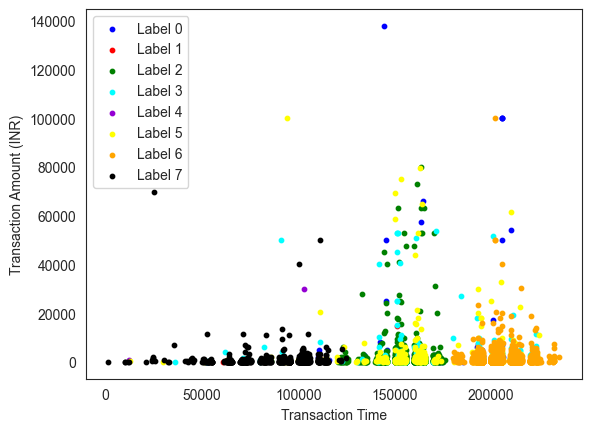

In [57]:
fig, ax = plt.subplots()
ax.scatter(df['TransactionTime'][df.label == 0], df["TransactionAmount (INR)"][df.label == 0],  c='blue', s=10 , label = 'Label 0')
ax.scatter(df['TransactionTime'][df.label == 1], df["TransactionAmount (INR)"][df.label == 1],  c='red', s=10, label = 'Label 1')
ax.scatter(df['TransactionTime'][df.label == 2], df["TransactionAmount (INR)"][df.label == 2],  c='green', s=10, label = 'Label 2')
ax.scatter(df['TransactionTime'][df.label == 3], df["TransactionAmount (INR)"][df.label == 3],  c='cyan', s=10, label = 'Label 3')
ax.scatter(df['TransactionTime'][df.label == 4], df["TransactionAmount (INR)"][df.label == 4],  c='darkviolet', s=10, label = 'Label 4')
ax.scatter(df['TransactionTime'][df.label == 5], df["TransactionAmount (INR)"][df.label == 5],  c='yellow', s=10, label = 'Label 5')
ax.scatter(df['TransactionTime'][df.label == 6], df["TransactionAmount (INR)"][df.label == 6],  c='orange', s=10, label = 'Label 6')
ax.scatter(df['TransactionTime'][df.label == 7], df["TransactionAmount (INR)"][df.label == 7],  c='black', s=10, label = 'Label 7')

plt.xlabel("Transaction Time")
plt.ylabel("Transaction Amount (INR)")
plt.legend()
plt.show()

In this plot, we can observe some of the clusters depending on the Transaction Time (Label 2, Label 5, Label 6 and Label 7).

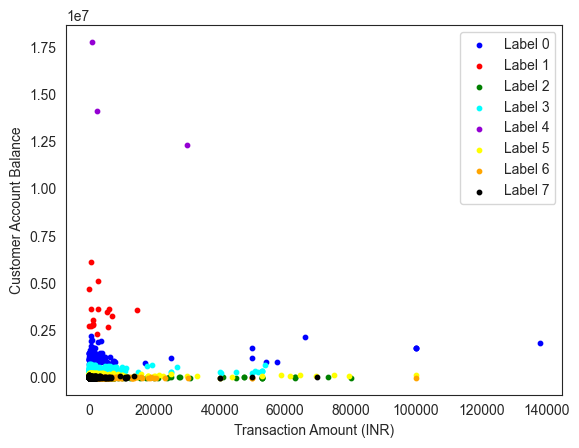

In [58]:
fig, ax = plt.subplots()
ax.scatter(df["TransactionAmount (INR)"][df.label == 0], df["CustAccountBalance"][df.label == 0],  c='blue', s=10 , label = 'Label 0')
ax.scatter(df["TransactionAmount (INR)"][df.label == 1], df["CustAccountBalance"][df.label == 1],  c='red', s=10, label = 'Label 1')
ax.scatter(df["TransactionAmount (INR)"][df.label == 2], df["CustAccountBalance"][df.label == 2],  c='green', s=10, label = 'Label 2')
ax.scatter(df["TransactionAmount (INR)"][df.label == 3], df["CustAccountBalance"][df.label == 3],  c='cyan', s=10, label = 'Label 3')
ax.scatter(df["TransactionAmount (INR)"][df.label == 4], df["CustAccountBalance"][df.label == 4],  c='darkviolet', s=10, label = 'Label 4')
ax.scatter(df["TransactionAmount (INR)"][df.label == 5], df["CustAccountBalance"][df.label == 5],  c='yellow', s=10, label = 'Label 5')
ax.scatter(df["TransactionAmount (INR)"][df.label == 6], df["CustAccountBalance"][df.label == 6],  c='orange', s=10, label = 'Label 6')
ax.scatter(df["TransactionAmount (INR)"][df.label == 7], df["CustAccountBalance"][df.label == 7],  c='black', s=10, label = 'Label 7')

plt.xlabel("Transaction Amount (INR)")
plt.ylabel("Customer Account Balance")
plt.legend()
plt.show()

While separating the data by Transaction Amount and Customer Account Balance, we can observe groups of cutomers clearly than the previous plot:

1. The first group (Label 0) have high account balance but low transaction amount than most of the customers .
2. The customers from second group (Label 1) have higher account balance than the first group and mostly low transaction amount same as the first group.
3. The third group of customers (Label 2) is not properly clustered based on transaction amount and account balance, but they have low account balance with different transaction amount.
4. The fourth group of customers (Label 3) have lower customer account balance comparing with the first two groups with low and medium transaction amount.
5. The customers from fifth group (Label 4) is not clustered properly based on this two features, but a few datapoints indicate that they have very high account balance (the highest among the groups).
6. The sixth group customers (Label 5) have lower account balance than the fourth group with different transaction amount.
7. The seventh group (Label 6) have the lowest account balance but they have higher transaction amount comparing than most of the customers.
8. The last group (Label 7) has the lowest account balance and the lowest transaction amount than all other groups.

Apart from these two features, the clusters of groups of customers depend on the other features too.

In [59]:
import torch
from kmeans_pytorch import kmeans

In [61]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=8, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 51it [00:00, 158.88it/s, center_shift=0.000000, iteration=51, tol=0.000100]           


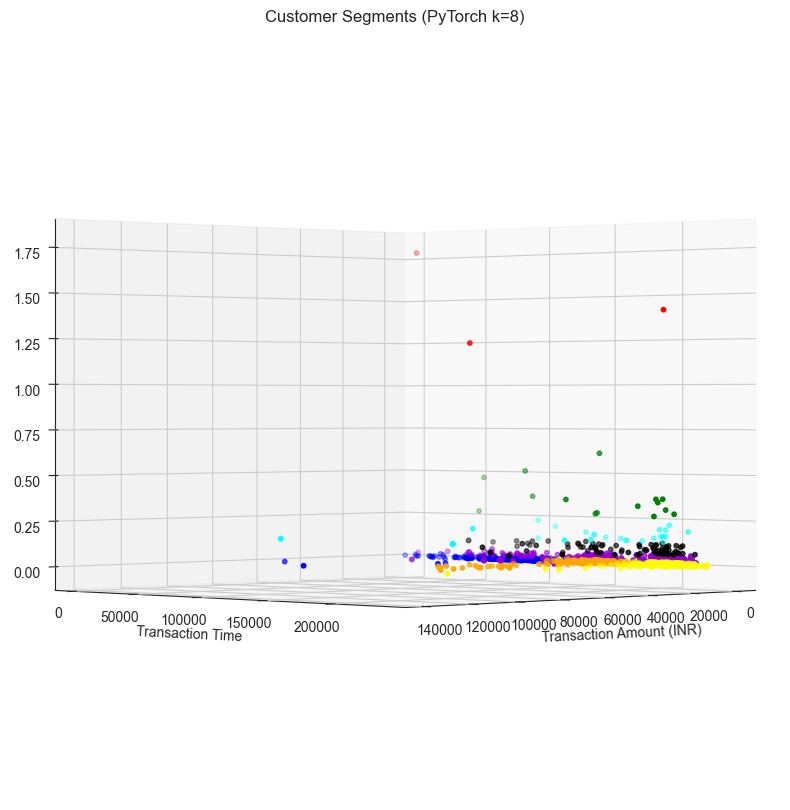

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["TransactionAmount (INR)"][df.label == 0], df.TransactionTime[df.label == 0], df.CustAccountBalance[df.label == 0], c='blue', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 1], df.TransactionTime[df.label == 1], df.CustAccountBalance[df.label == 1], c='red', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 2], df.TransactionTime[df.label == 2], df.CustAccountBalance[df.label == 2], c='green', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 3], df.TransactionTime[df.label == 3], df.CustAccountBalance[df.label == 3], c='cyan', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 4], df.TransactionTime[df.label == 4], df.CustAccountBalance[df.label == 4], c='darkviolet', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 5], df.TransactionTime[df.label == 5], df.CustAccountBalance[df.label == 5], c='yellow', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 6], df.TransactionTime[df.label == 6], df.CustAccountBalance[df.label == 6], c='orange', s=10)
ax.scatter(df["TransactionAmount (INR)"][df.label == 7], df.TransactionTime[df.label == 7], df.CustAccountBalance[df.label == 7], c='black', s=10)

ax.view_init(0, 45)
plt.xlabel("Transaction Amount (INR)")
plt.ylabel("Transaction Time")
ax.set_zlabel("Customer Account Balance")
plt.title('Customer Segments (PyTorch k=8)')
plt.show()

Using PyTorch, this 3D plot shows the 8 groups of customers depending on Transaction Amount, Transaction Time and Customer Account Balance.

## Principle Component Analysis (PCA)

PCA or Principal Component Analysis is a data transformation tecnique for decreasing dimensions or features. This technique is useful for decreasing the complexity of a data set and for visualization.

In visualization, you want to see your data as lines, points, and a point cloud. It is easy to see if it is three dimensions or less. What about four dimesions? Oh no, we cannot show it clearly, so further
decreasing dimensionality might help.

In machine learning, having many features as possible might be useful for accurate modeling accurately. However, it is not every case that too much information could help such as unrelated features, features that are dependent 
on each other, or simply too many features (the curse of dimensionality).

## What happens after PCA?

Main concept of PCA is to find a new axis which can project a lot of data features as much as possible. The new axis is come from those features, so the new data still keep variance of data same as before decreasing dimensions.

![pca](PCA1.png)

Assume you have $n$ set of data with $d$ features which tell you from the smallest thing (such as atom). After using PCA, you will get the $n$ set of data with $k$ features which tell you in group of things.

![pca](PCA2.png)


### Mathematics of PCA

Assume $w$ is a unit vector along the axis
along which the data vary as much as possible, and mean vector $\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$.

\begin{equation}
w_1 = \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu))^2 \\
= \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu)(x^{(i)}-\mu)^Tw) \\
= \text{argmax}_w w^T \color{red}{S}w
\end{equation}

In this case $S$ is the **covariance matrix** of the dataset $\mathtt{X}$.

### Step By Step Computation in PCA

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the principal components
5. Reducing the dimensions of the data set

#### Let's start

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

Load movie names and movie ratings

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [3]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


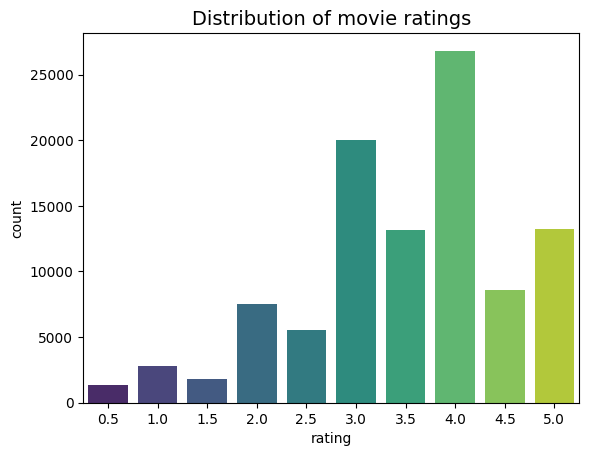

In [4]:
seaborn.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Formatting the data**

In [5]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

### 1) Standardization of the data

Standardization is the way to scale data into same scale. Because some information such as housing price (10,000-100,000 us) and area size (100-1000$m^2$) are not the same scale. It makes impact in one data, but another has lower impact.

Standardization can be calculated in many way. One of the equation is:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}

In [6]:
X_std = StandardScaler().fit_transform(df1)

### 2) Compute the covariance matrix

Covariance matrix is a $p\times p$ matrix where $p$ represents the dimension of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For 2-dimensional dataset with variable $a$ and $b$, the covariance matrix is $2\times 2$ matrix as:

\begin{equation}
S=\begin{bmatrix}
cov(a,a) & cov(a,b) \\ 
cov(b,a) & cov(b,b)
\end{bmatrix} = (x_t-\mu)(x_t-\mu)^T
\end{equation}

We can say that $cov(a,b)=cov(b,a)$.

In [7]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


### 3) Calculating the Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set.

**What are Principal Components?**

Principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

*If dataset of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.*

**Eigenvectors fall into this process**

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components


Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

In [8]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ... -5.91242474e-11-1.18086446e-11j
  -5.91242474e-11+1.18086446e-11j -6.74714932e-11+0.00000000e+00j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ... -8.46871455e-11+7.64197270e-11j
  -8.46871455e-11-7.64197270e-11j -2.27695585e-11+0.00000000e+00j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ...  2.14488190e-11-2.83423730e-11j
   2.14488190e-11+2.83423730e-11j -3.67524888e-12+0.00000000e+00j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ... -2.75608428e-09+1.62546785e-09j
  -2.75608428e-09-1.62546785e-09j -1.36699251e-09+0.00000000e+00j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  3.91584046e-09-2.20105767e-09j
   3.91584046e-09+2.20105767e-09j

**Compute the feature vector**

Rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [9]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544953
487.22068862940324
438.98894895557385
379.0404527252998
324.3162458652443
259.1091962886279
251.67075199496463
226.08065316490584
206.7704320238967
186.08012008011886
180.3568156736275
150.576898268785
140.5335104255665
135.00425543775668
116.75931121355646
111.22844429826323
105.9858855640002
101.52061108863391
92.38143975955731
87.20146448316888
83.9470452582847
76.51329078142057
73.12943769509833
71.33450019035213
68.66916875072941
68.11563805135057
66.09778445224087
64.79772886519696
64.76738664207949
60.57541016802263
60.09570157695373
58.444062203130464
57.14388076236254
55.70369700851545
55.153276987647
54.423616681664285
53.62311697140767
49.75425330272164
49.2256895830105
47.79220889336291
46.74358114245116
46.44527988080534
45.339551347469715
45.09994762096559
44.619865966440614
44.25650246763794
43.96138776159117
42.67209649629804
41.73888704520224
41.050333248885416
41.22691039968687
40.02114410412705
39.198143822752925
37.

### 4) Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.

In [10]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


### 5) Reducing the dimensions of the data set

To perform PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

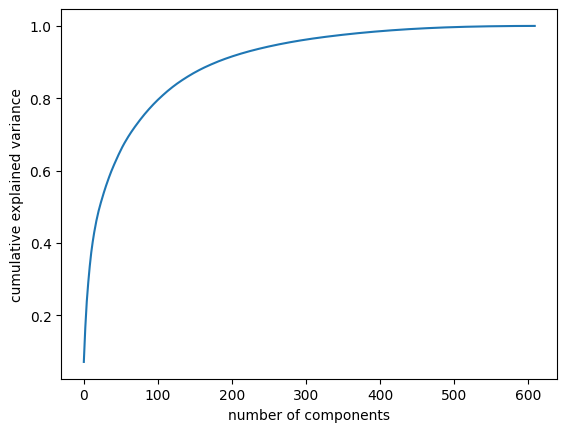

In [11]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Take Home Exercise

Use [Siricon wafer thickness](https://openmv.net/info/silicon-wafer-thickness) dataset which contains data
- $N=184$
- $k=9$

1. Build a PCA model on all the data.
2. Plot the scores for the first two components. What do you notice? Investigate the outliers, and the raw data for each of these unusual observations. What do you conclude about those observations?

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

In [3]:
silicon = pd.read_csv('silicon-wafer-thickness.csv')

In [4]:
n_samples = len(silicon)

print(f"Number of samples: {n_samples}")

Number of samples: 184


In [5]:
features = ['G1', 'G2']

In [6]:
x = silicon.loc[:, features].values

In [7]:
x_std = StandardScaler().fit_transform(x)

In [8]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)

print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[1.00546448 0.98980538]
 [0.98980538 1.00546448]]


In [9]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
nEigenvalues n[0.0156591  1.99526986]


In [10]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
0.015659100437584894
1.9952698613110487


In [11]:
pca = PCA(n_components=2)
xpca = pca.fit_transform(x)
xpca.shape

(184, 2)

In [12]:
print(pca.explained_variance_ratio_)

[0.99226223 0.00773777]


Text(0.5, 1.0, 'Scores for First Two Components')

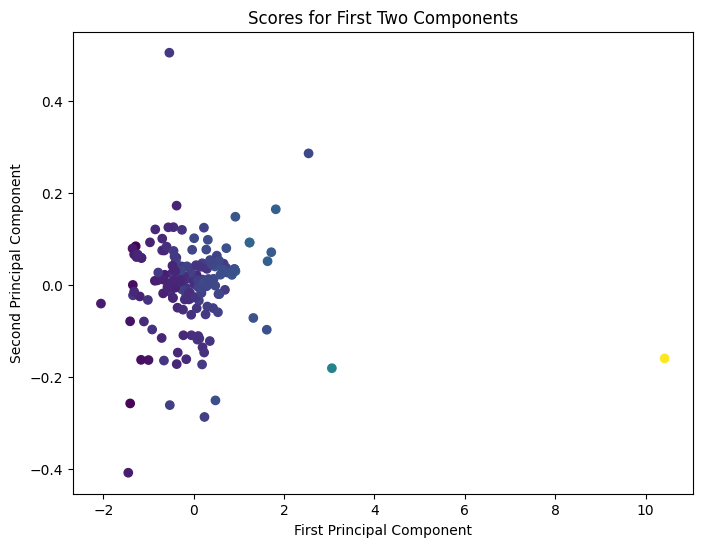

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(xpca[:,0], xpca[:,1], c=silicon['G9'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scores for First Two Components')

From this plot, we can observe the outliers when (First Principal Component, Second Principal Component) are (-1.5, -0.4), (-1, 0.55), (2.5, 0.3), (3, - 0.18) and when the first prinpal component is greater than 10.

## Report

For in-lab exercise, I generate 100 samples from three different 2D Gaussian distributions and plotted the data. Then I initialized three arbitrary means and animated iterative process of cluster assignment with their means. After that, I used the "Mall_Customers.csv" dataset for customer segmentation with K-means clustering. After data processing and data cleaning, I implemented K-means clustering to choose a good value of "k" using the "elbow method", where an elbow was noticeable where k equals to 3. That is why, I rerun the K-Means with k equals to 3. I plotted the three clusters and described them from a business point of view. Since the distortion plot is noisy due to random initial conditions, I modified the optimization in K-Means clustering to a number of runs. I re-plotted the distortion over the runs to check if an "elbow" is more prominent. I found a more prominent "elbow" when k equals to 6 in this part. After that, I did the same K-means for k equals to 3 using the PyTorch library.

For the take-home exercise, I used the "bank_transactions.csv" dataset. I used the first 5000 rows from the dataset since the dataset is too large. After cleaning and preprocessing the data, I used the same K-means clustering for customer segmentation. I obtained a prominent "elbow" when k equals to 5 and then rerun the K-means with k equals to 5. Then I tried to plot the clusters in terms of the features of the data. Then I modified the optimization in K-Means clustering to a number of runs to check if an "elbow" is more prominent. I found a more prominent "elbow" when k equals to 8 in the distortion plot over the runs. Using k equals to 8, I tried to describe the clusters. Again, I used the PyTorch library to implement K-means for k equals to 8.

For in-lab exercise, I used the "movies.csv" and "ratings.csv" to perform Principle Component Analysis (PCA). Then I standardized the data, computed the covariance matrix, calculated the eigenvectors and eigenvalues, computed the principal components and finally reduced the dimensions of the dataset.

For take-home exercise, I used the "silicon-wafer-thickness.csv" dataset and built a PCA model on the data. I plotted the scores for the first two components of the dataset and concluded with my observations.